In [72]:
import numpy as np 
import scipy 
import pandas as pd
import networkx as nx
from matplotlib import pyplot as plt
import torch_geometric
import seaborn as sbn

from sknetwork.embedding import Spectral

ModuleNotFoundError: No module named 'sknetwork'

In [4]:
KCG = torch_geometric.datasets.KarateClub()
KCG.data

Data(x=[34, 34], edge_index=[2, 156], y=[34], train_mask=[34])

In [5]:
G = nx.Graph() 
_ = [G.add_node(i, y=yy) for i,yy in enumerate(KCG.data.y.numpy())]
G.add_edges_from([(a.item(),b.item()) for a,b in zip(*KCG.data.edge_index)])

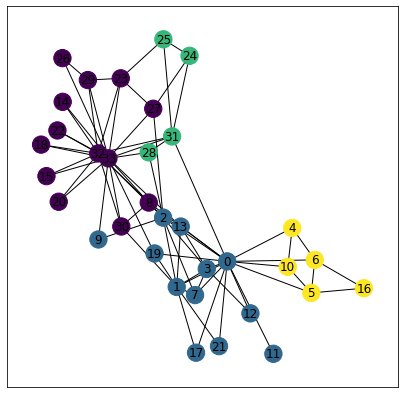

In [109]:
plt.figure(figsize=(7,7))
pos = nx.spring_layout(G)
nx.draw_networkx(G, node_color=list(nx.get_node_attributes(G, 'y').values()), pos=pos)
plt.show()

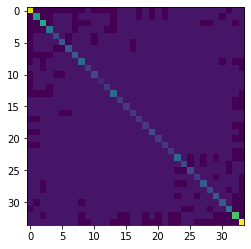

In [86]:
# adjacency matrix 
A = np.array( nx.adjacency_matrix(G).todense() )

# degree matrix 
D = np.eye(A.shape[0])*A.sum(axis=1) 

# laplacian matrix 
L = D - A

plt.figure() 
plt.imshow(L)
plt.show()

In [87]:
L

array([[16., -1., -1., ..., -1.,  0.,  0.],
       [-1.,  9., -1., ...,  0.,  0.,  0.],
       [-1., -1., 10., ...,  0., -1.,  0.],
       ...,
       [-1.,  0.,  0., ...,  6., -1., -1.],
       [ 0.,  0., -1., ..., -1., 12., -1.],
       [ 0.,  0.,  0., ..., -1., -1., 17.]])

In [88]:
val,vec = np.linalg.eig(L)

In [89]:
# sort by eigenvalue size 
index = np.argsort(val)
val = val[index]
vec = vec[:, index]

In [90]:
val

array([-2.06780238e-15,  4.68525227e-01,  9.09247664e-01,  1.12501072e+00,
        1.25940411e+00,  1.59928308e+00,  1.76189862e+00,  1.82605521e+00,
        1.95505045e+00,  2.00000000e+00,  2.00000000e+00,  2.00000000e+00,
        2.00000000e+00,  2.00000000e+00,  2.48709173e+00,  2.74915718e+00,
        3.01396297e+00,  3.24206748e+00,  3.37615409e+00,  3.38196601e+00,
        3.47218740e+00,  4.27587682e+00,  4.48000767e+00,  4.58079267e+00,
        5.37859508e+00,  5.61803399e+00,  6.33159222e+00,  6.51554463e+00,
        6.99619703e+00,  9.77724095e+00,  1.09210675e+01,  1.33061223e+01,
        1.70551712e+01,  1.81366960e+01])

In [91]:
vec.shape

(34, 34)

In [92]:
yy = [str(x) for x in list(nx.get_node_attributes(G, 'y').values())]

In [93]:
df = pd.DataFrame({**{f'u{i}':vec[:, i] for i in range(A.shape[0])}, **{'y':yy}})
df.head()

,u0,u1,u2,u3,u4,u5,u6,u7,u8,u9,...,u25,u26,u27,u28,u29,u30,u31,u32,u33,y
0,0.171499,-0.112137,0.069404,0.071819,-0.015996,0.009439,0.007585,0.020588,-0.037628,-1.003354e-16,...,-4.116227e-17,0.000889,-0.062209,0.002781,0.034726,0.020408,-0.094783,-0.940932,0.193749,1
1,0.171499,-0.041288,0.095147,0.194548,-0.006478,0.014255,0.099555,-0.018288,0.043021,8.277786e-17,...,3.675899e-16,0.006347,0.022675,0.046271,0.800724,-0.455960,0.099185,0.065865,0.005224,1
2,0.171499,0.023219,0.042704,0.098811,-0.021339,-0.022527,-0.054614,-0.122763,-0.001317,-2.010186e-16,...,-5.065181e-17,0.058424,0.046936,0.038727,0.399152,0.776431,-0.314798,0.115069,0.029186,1
3,0.171499,-0.055500,0.105843,0.212178,-0.027270,0.019665,-0.170401,0.044008,0.043672,1.971988e-16,...,1.089418e-16,-0.005760,0.057737,0.823172,-0.236911,-0.053471,0.033735,0.054758,-0.009291,1
4,0.171499,-0.284605,-0.121266,-0.031131,0.000375,0.010026,0.017277,0.068662,-0.540899,-2.014431e-15,...,3.717480e-01,-0.000145,0.010015,-0.000425,-0.003856,-0.002020,0.007622,0.058288,-0.011253,3


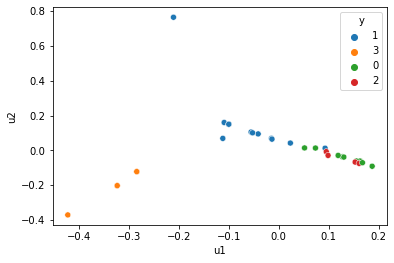

In [97]:
plt.figure()
sbn.scatterplot(x='u1', y='u2', hue='y', data=df)

plt.show()

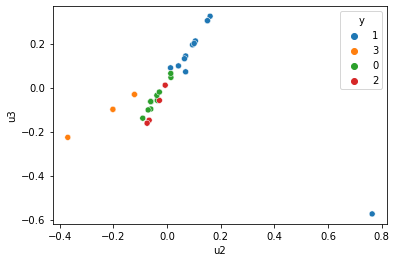

In [95]:
plt.figure()
sbn.scatterplot(x='u2', y='u3', hue='y', data=df)
plt.show()

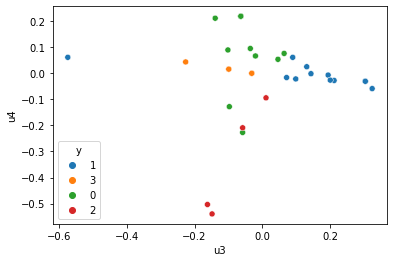

In [96]:
plt.figure()
sbn.scatterplot(x='u3', y='u4', hue='y', data=df)
plt.show()

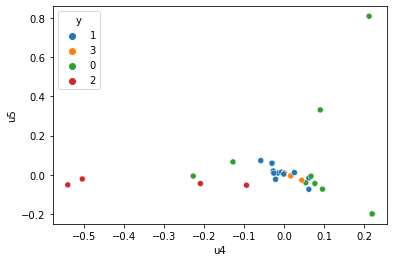

In [98]:
plt.figure()
sbn.scatterplot(x='u4', y='u5', hue='y', data=df)
plt.show()

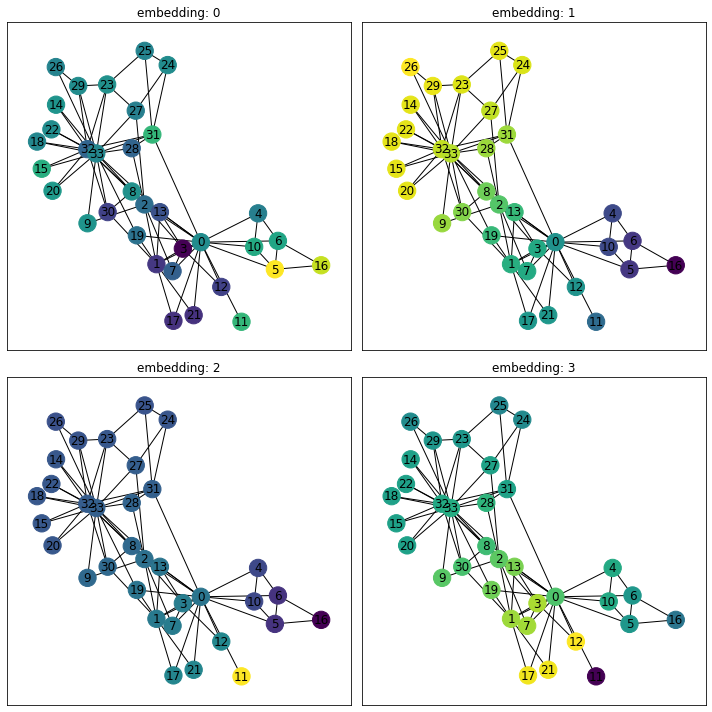

In [110]:
f,axes = plt.subplots(2,2, figsize=(10,10), sharex=True, sharey=True)

for i, ax in enumerate(axes.flat): 
    nx.draw_networkx(G, node_color=vec[:, i], ax=ax, pos=pos)
    ax.set_title(f'embedding: {i}')
plt.tight_layout()
plt.show()

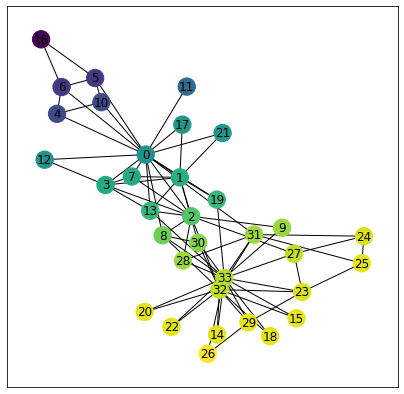

In [101]:
plt.figure(figsize=(7,7))
nx.draw_networkx(G, node_color=vec[:, 1])
plt.show()